# **Nonlinear Pendulum Equation**

In this section, we'll explore the equation of motion for a nonlinear pendulum with air friction. The equation describes the angular displacement of the pendulum as it oscillates. The equation takes into account the effects of air friction, and it's nonlinear component.

The equation of motion for the pendulum is given by:

$$
\ddot{\theta} = -\frac{g}{L} \sin(\theta) - \frac{b}{m} \dot{\theta}
$$

Where:
- $\theta$ $\to$ angular displacement of the pendulum at time $t$,
- $g$ $\to$ acceleration due to gravity,
- $L$ $\to$ length of the pendulum,
- $b$ $\to$ damping coefficient due to air friction,
- $m$ $\to$ mass of the pendulum.

In [3]:
import math
import matplotlib.pyplot as plt

In [1]:
def angular_acceleration(theta, omega, g=9.81, L=1, b=0.1, m=1):
    """
    Angular acceleration for a pendulum
    INPUTS:
        theta: angle of the pendulum
        omega: angular velocity of the pendulum
        g: gravitational acceleration
        L: length of the pendulum
        b: damping coefficient
        m: mass of the pendulum
    OUTPUTS:
        angular acceleration
    """

    return (-g / L) * math.sin(theta) - (b / m) * omega

def euler_method(theta_0, omega_0, t_0, t_f, dt, g=9.81, L=1, b=0.1, m=1):
    """
    Euler method for solving a second order differential equation
    INPUTS:
        theta_0: initial angle of the pendulum
        omega_0: initial angular velocity of the pendulum
        t_0: initial time
        t_f: final time
        dt: time step
        g: gravitational acceleration
        L: length of the pendulum
        b: damping coefficient
        m: mass of the pendulum
    OUTPUTS:
        time_values: list of time values
        theta_values: list of angle values
        omega_values: list of angular velocity values    
    """
    
    time_values = []
    theta_values = []
    omega_values = []

    # Initial conditions
    t = t_0
    theta = theta_0
    omega = omega_0
    
    while t <= t_f:
        time_values.append(t)
        theta_values.append(theta)
        omega_values.append(omega)

        omega += dt * angular_acceleration(theta, omega, g, L, b, m)
        theta += dt * omega
        t += dt

    return time_values, theta_values, omega_values

In [4]:
# Parameters
g = 10     # acceleration due to gravity (m/s^2)
L = 2.0      # length of the pendulum (m)
b = 0.1      # damping coefficient due to air friction
m = 10.0      # mass of the pendulum (kg)

# Initial conditions
theta_0 = math.pi / 3
omega_0 = 0.0

# Time parameters
t_0 = 0.0
t_f = 10.0
dt = 0.1

time_values, theta_values, omega_values = euler_method(
    theta_0=theta_0, omega_0=omega_0,
    t_0=t_0, t_f=t_f, dt=dt,
    g=g, L=L, b=b, m=m
)

In [10]:
print(f"Time values: {time_values}")
print(f"Angle values: {theta_values}")
print(f"Angular velocity values: {omega_values}")

Time values: [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999, 1.0999999999999999, 1.2, 1.3, 1.4000000000000001, 1.5000000000000002, 1.6000000000000003, 1.7000000000000004, 1.8000000000000005, 1.9000000000000006, 2.0000000000000004, 2.1000000000000005, 2.2000000000000006, 2.3000000000000007, 2.400000000000001, 2.500000000000001, 2.600000000000001, 2.700000000000001, 2.800000000000001, 2.9000000000000012, 3.0000000000000013, 3.1000000000000014, 3.2000000000000015, 3.3000000000000016, 3.4000000000000017, 3.5000000000000018, 3.600000000000002, 3.700000000000002, 3.800000000000002, 3.900000000000002, 4.000000000000002, 4.100000000000001, 4.200000000000001, 4.300000000000001, 4.4, 4.5, 4.6, 4.699999999999999, 4.799999999999999, 4.899999999999999, 4.999999999999998, 5.099999999999998, 5.1999999999999975, 5.299999999999997, 5.399999999999997, 5.4999999999999964, 5.599999999999996, 5.699999999999996, 5.799999999999995, 5.899999

Text(0.5, 0, 'Time')

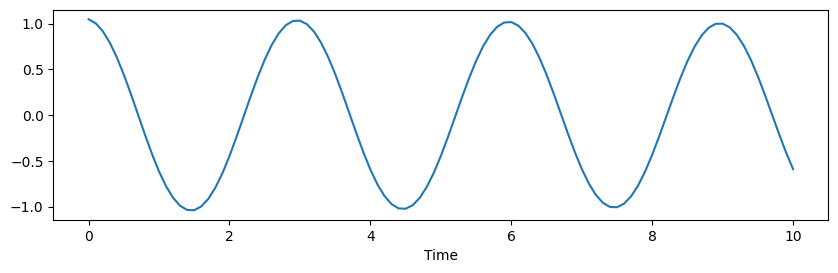

In [9]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(time_values, theta_values, label='theta')
plt.xlabel('Time')
# plt.ylabel('Angular Displacement')

# plt.subplot(2, 1, 1)
# plt.plot(time_values, omega_values, 'r', label='omega')
# plt.xlabel('Time')
# # plt.ylabel('Angular Velocity')

# plt.legend()
# plt.tight_layout()
# plt.show()


In [14]:
x = 1
y = 2
print(f"x={x}, y={y}")

x=1, y=2


In [15]:
y, x = x, y
print(f"x={x}, y={y}")

x=2, y=1


In [17]:
print(f"{x == x + y}")

False
